In [123]:
#===========================================#
#=== Linux OS running OK                 ===#
#=== Test iMac OS OK (needs modify path) ===#
#===========================================#
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [108]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [109]:
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

In [110]:
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

[]

In [111]:
# Listing 2.1 Loading the MNIST dataset in Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [112]:
print("train_images : \n", train_images[0:1])

train_images : 
 [[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   0   0   0   0   0 

In [113]:
#print(type(train_labels))
#print(train_labels)
print(len(train_labels))

60000


In [114]:
# Listing 2.2 The network architecture
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [115]:
# Listing 2.3 The compilation step
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])


In [116]:
# Listing 2.4 Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [117]:
# Listing 2.5 Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [118]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 14s 23ms/step - loss: 0.4307 - accuracy: 0.8712
Epoch 2/5
469/469 [==============================] - 12s 25ms/step - loss: 0.1104 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0680 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0476 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0348 - accuracy: 0.9899


In [119]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_loss= ", test_loss, ", test_acc= ", test_acc)


313/313 [==============================] - 4s 10ms/step - loss: 0.0637 - accuracy: 0.9811
test_loss=  0.06371374428272247 , test_acc=  0.9811000227928162


In [124]:
# Reload dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [125]:
# Listing 2.6 Displaying the fourth digit
digit = train_images[4]
print(digit)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

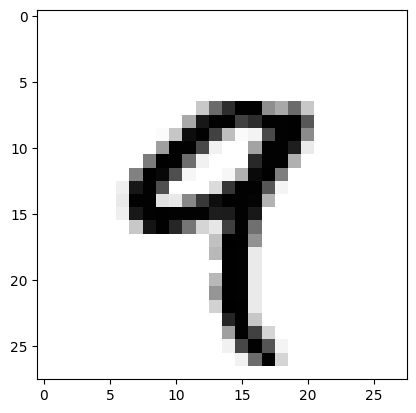

9


In [126]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print(train_labels[4])

In [127]:
m_slice = train_images[10:100]
print(m_slice.shape)

(90, 28, 28)


In [128]:
m_slice = train_images[10:100, :, :]
print(m_slice.shape)

(90, 28, 28)


In [131]:
import numpy as np
x = np.array([[2, 2],[1, 3], [3, 2]])
print(x, type(x), x.shape)
y = np.array([[1], [3], [5]])
print(y, type(y), y.shape)
z = x * y
print(z)

[[2 2]
 [1 3]
 [3 2]] <class 'numpy.ndarray'> (3, 2)
[[1]
 [3]
 [5]] <class 'numpy.ndarray'> (3, 1)
[[ 2  2]
 [ 3  9]
 [15 10]]


In [130]:
x = np.random.random((2,2,3,2))
print(type(x), x.shape)
print(x)

y = np.random.random((2,3,1))
print(type(y), y.shape)
print(y)

z = np.maximum(x,y)
print(type(z), z.shape)
print(z)


<class 'numpy.ndarray'> (2, 2, 3, 2)
[[[[0.78199065 0.92081943]
   [0.71422333 0.76870562]
   [0.94272292 0.67996178]]

  [[0.24013959 0.50811381]
   [0.93292671 0.90141323]
   [0.2411391  0.08983972]]]


 [[[0.29289664 0.73135991]
   [0.83000279 0.61968753]
   [0.25360698 0.91890389]]

  [[0.018105   0.69684653]
   [0.13489779 0.6515333 ]
   [0.45278927 0.78451312]]]]
<class 'numpy.ndarray'> (2, 3, 1)
[[[0.95114208]
  [0.89335428]
  [0.74280666]]

 [[0.11912125]
  [0.11583658]
  [0.8839438 ]]]
<class 'numpy.ndarray'> (2, 2, 3, 2)
[[[[0.95114208 0.95114208]
   [0.89335428 0.89335428]
   [0.94272292 0.74280666]]

  [[0.24013959 0.50811381]
   [0.93292671 0.90141323]
   [0.8839438  0.8839438 ]]]


 [[[0.95114208 0.95114208]
   [0.89335428 0.89335428]
   [0.74280666 0.91890389]]

  [[0.11912125 0.69684653]
   [0.13489779 0.6515333 ]
   [0.8839438  0.8839438 ]]]]


In [132]:
# 點積範例
x = np.random.random((3,2))
print(type(x), x.shape)
print(x)

y = np.random.random((2,3))
print(type(y), y.shape)
print(y)

z = np.dot(x,y)
print(type(z), z.shape)
print(z)

<class 'numpy.ndarray'> (3, 2)
[[0.34586533 0.29794327]
 [0.96129548 0.14589664]
 [0.62862958 0.51987598]]
<class 'numpy.ndarray'> (2, 3)
[[0.16613546 0.0664113  0.21991292]
 [0.81854886 0.61981426 0.51956965]]
<class 'numpy.ndarray'> (3, 3)
[[0.30134162 0.20763885 0.23086254]
 [0.27912879 0.1542697  0.28720476]
 [0.52998155 0.36397465 0.40835555]]


In [136]:
# 兩個向量點積是標量
x = np.random.random((3,2))
y = np.random.random((2,1))
print("x=\n ", x, "\ny=\n ", y)

z = np.dot(x, y)
print("z= \n", z)

x=
  [[0.69505712 0.52462138]
 [0.02504691 0.86790935]
 [0.074273   0.26145244]] 
y=
  [[0.01054292]
 [0.45681292]]
z= 
 [[0.24698175]
 [0.39673627]
 [0.12021791]]


In [137]:
# 兩個向量的點積
def naive_vector_dot(x, y) :
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    z = 0.
    for i in range(x.shape[0]) :
        z += x[i] * y[i]
    return z


In [147]:
x = np.random.random(3)
y = np.random.random((3))
print("x=\n ", x, "\ny=\n ", y)
print("x.shape=\n ", x.shape, "\ny.shape=\n ", y.shape)

print(naive_vector_dot(x, y)) # 兩向量點積，回傳一個標量

x=
  [0.19329706 0.81552431 0.31476371] 
y=
  [0.95544345 0.21617273 0.06620371]
x.shape=
  (3,) 
y.shape=
  (3,)
0.38181705019603523


In [148]:
import numpy as np

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1 
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0]) 
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [162]:
x = np.random.random((3,2))
y = np.random.random((2,))
print("x=\n ", x, "\ny=\n ", y)
print("x.shape=", len(x.shape), ",y.shape=", len(y.shape))

print("z=", naive_matrix_vector_dot(x, y))

x=
  [[0.6324925  0.92236951]
 [0.17479409 0.13822682]
 [0.16496165 0.78521123]] 
y=
  [0.5899212  0.00891357]
x.shape= 2 ,y.shape= 1
z= [0.38134234 0.10434683 0.10431341]


In [164]:
def naive_matrix_vector_dot2(x, y) :
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]) :
        z[i] = naive_vector_dot(x[i, :], y)
    return z
    

In [165]:
x = np.random.random((3,2))
y = np.random.random((2,))
print("x=\n ", x, "\ny=\n ", y)
print("x.shape=", len(x.shape), ",y.shape=", len(y.shape))

print("z=", naive_matrix_vector_dot2(x, y))

x=
  [[0.22759118 0.20094028]
 [0.10153539 0.34755197]
 [0.43937385 0.83060854]] 
y=
  [0.97755961 0.44979827]
x.shape= 2 ,y.shape= 1
z= [0.31286654 0.25558517 0.80312041]
